<a href="https://colab.research.google.com/github/yeoncw1226/2024_2_dataScienceProject_team5/blob/main/dsp_3dclustering_k_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 I used 3d clustering for districts(구) in Seoul to find reasonable place for building international dormitory. I used three variables; commute time from dormitory to universities in Seoul, average land cost, and number of international students in that districts.

**I will describe the data used for the analyze.**


 I used k-mean, k-medoid, hierarchical clustering, and DBSCAN to cluster districts and find the best association.
 For choosing k, I used elbow method, resulted as k = 3 for all 3 methods.

for each clusterings, plotted first and if hard to choose cluster,

find **argmax(numIntl-commuteTime-landCost)**

Finally, get majority vote from k-mean, k-medoid, hierarchical

--> 광진구, 동대문구, 서대문구

In [ ]:
'''
1. get 4 random points from each districts.
2. get mean commute time from random points to universities in Seoul for each districts.
3. In 2, get # of intl students in university as a weight.
'''
commuteTime = {'강남구': 60.0, '강동구': 61.0, '강북구': 48.0, '강서구': 58.0,    '관악구': 66.0, '광진구': 46.0, '구로구': 66.0, '금천구': 75.0,
               '노원구': 57.0, '도봉구': 65.0, '동대문구': 42.0, '동작구': 50.0, '마포구': 47.0, '서대문구': 40.0, '서초구': 57.0, '성동구': 37.0,
               '성북구': 85.0, '송파구': 62.0, '양천구': 62.0, '영등포구': 46.0, '용산구': 40.0, '은평구': 53.0, '종로구': 42.0, '중구': 35.0, '중랑구': 53.0}


# Use Officially announced land price for each neighborhood, get mean value for each districts.

landCost = {
 '강남구': 11922940, '강동구': 4136539, '강북구': 2642841, '강서구': 2847634,'관악구': 3986627, '광진구': 4371127, '구로구': 2900773, '금천구': 2930902,
 '노원구': 2559028, '도봉구': 2390374, '동대문구': 3783838, '동작구': 4280654, '마포구': 6174009, '서대문구': 3771586, '서초구': 7218511, '성동구': 4884766,
 '성북구': 3190132, '송파구': 5971945, '양천구': 3399776, '영등포구': 4503093, '용산구': 6812532, '은평구': 3166812, '종로구': 5937878, '중구': 9949269, '중랑구': 2983133}


# number of foreigns, especially international students
numIntl = {'강남구': 426, '강동구': 296, '강북구': 1881, '강서구': 305, '관악구': 4369, '광진구': 6768, '구로구': 570,
           '금천구': 244, '노원구': 2238, '도봉구': 680, '동대문구': 11744, '동작구': 4647, '마포구': 3927, '서대문구': 7732,
           '서초구': 283, '성동구': 3163, '성북구': 7489, '송파구': 252, '양천구': 126, '영등포구': 896, '용산구': 1037,
           '은평구': 368, '종로구': 5452, '중구': 3051, '중랑구': 1150}



#commuteTime and landcost should be low, numIntl should be high.

for commuteTime, 유민선's code; commute time by transportation from <random 4 points in each districts> to universities, then multiply # of intl in universities as weights.

landcost: 공시지가 평균

numIntl: 서울시 외국인주민; 유학생 카테고리


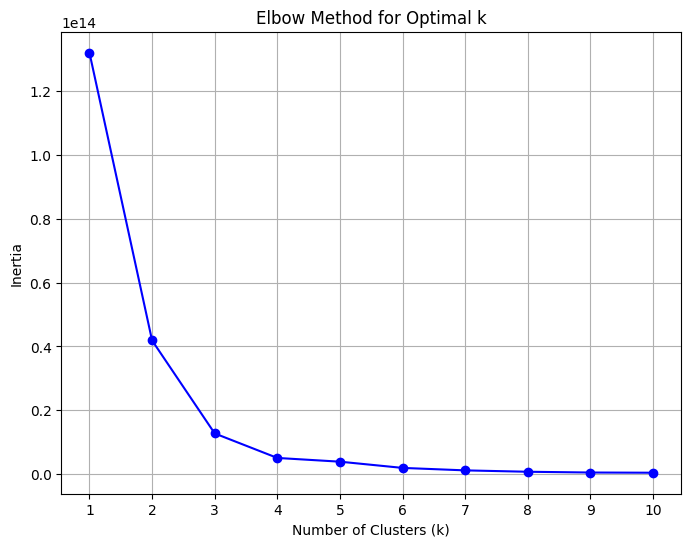

In [ ]:
#elbow method for k-mean
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data
commuteTime = {'강남구': 60.0, '강동구': 61.0, '강북구': 48.0, '강서구': 58.0,
               '관악구': 66.0, '광진구': 46.0, '구로구': 66.0, '금천구': 75.0,
               '노원구': 57.0, '도봉구': 65.0, '동대문구': 42.0, '동작구': 50.0,
               '마포구': 47.0, '서대문구': 40.0, '서초구': 57.0, '성동구': 37.0,
               '성북구': 85.0, '송파구': 62.0, '양천구': 62.0, '영등포구': 46.0,
               '용산구': 40.0, '은평구': 53.0, '종로구': 42.0, '중구': 35.0,
               '중랑구': 53.0}

landCost = {
 '강남구': 11922940, '강동구': 4136539, '강북구': 2642841, '강서구': 2847634,'관악구': 3986627, '광진구': 4371127, '구로구': 2900773, '금천구': 2930902,
 '노원구': 2559028, '도봉구': 2390374, '동대문구': 3783838, '동작구': 4280654, '마포구': 6174009, '서대문구': 3771586, '서초구': 7218511, '성동구': 4884766,
 '성북구': 3190132, '송파구': 5971945, '양천구': 3399776, '영등포구': 4503093, '용산구': 6812532, '은평구': 3166812, '종로구': 5937878, '중구': 9949269, '중랑구': 2983133}


numIntl = {'강남구': 426, '강동구': 296, '강북구': 1881, '강서구': 305, '관악구': 4369, '광진구': 6768, '구로구': 570,
           '금천구': 244, '노원구': 2238, '도봉구': 680, '동대문구': 11744, '동작구': 4647, '마포구': 3927, '서대문구': 7732,
           '서초구': 283, '성동구': 3163, '성북구': 7489, '송파구': 252, '양천구': 126, '영등포구': 896, '용산구': 1037,
           '은평구': 368, '종로구': 5452, '중구': 3051, '중랑구': 1150}

# DataFrame
df = pd.DataFrame({
    'District': commuteTime.keys(),
    'CommuteTime': commuteTime.values(),
    'LandCost': landCost.values(),
    'NumIntl': numIntl.values()
})


# Calculate inertia for different values of k
inertia = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['CommuteTime', 'LandCost', 'NumIntl']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# when 1<=k<=3, slopes decrease radpidly, after 3, decrease slowly
# --> k = 3

In [ ]:
#k-mean
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

np.set_printoptions(suppress=True)

# 데이터 정규화
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['CommuteTime', 'LandCost', 'NumIntl']])

# K-Means Clustering (정규화 데이터)
num_clusters = 3
kmeans_normalized = KMeans(n_clusters=num_clusters, random_state=0)
df['Cluster_Kmean_Normalized'] = kmeans_normalized.fit_predict(normalized_data)

# 정규화 데이터의 클러스터 중심 출력
print("\nCluster Centers (Normalized Data):")
print('(Normalized Commute Time, Normalized Land Cost, Normalized NumIntl)')
for i, center in enumerate(kmeans_normalized.cluster_centers_):
    print(f"Cluster {i + 1}: {center}")

# Cluster 1에 속하는 지역 출력
cluster_1_districts = df[df['Cluster_Kmean_Normalized'] == 0]['District']
print("\nDistricts in Cluster 1 (Normalized Data):")
print(cluster_1_districts.tolist())

# Plotly 3D Scatter Plot (정규화 데이터)
fig = go.Figure()

# Add clusters
colors = ['red', 'green', 'blue']
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster_Kmean_Normalized'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=normalized_data[df['Cluster_Kmean_Normalized'] == cluster][:, 0],
        y=normalized_data[df['Cluster_Kmean_Normalized'] == cluster][:, 1],
        z=normalized_data[df['Cluster_Kmean_Normalized'] == cluster][:, 2],
        mode='markers',
        marker=dict(size=5, color=colors[cluster]),
        name=f'Cluster {cluster + 1}'
    ))

# Add centroids
fig.add_trace(go.Scatter3d(
    x=kmeans_normalized.cluster_centers_[:, 0],
    y=kmeans_normalized.cluster_centers_[:, 1],
    z=kmeans_normalized.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(size=10, color='black', symbol='x'),
    name='Centroids'
))

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title='Normalized Commute Time',
        yaxis_title='Normalized Land Cost',
        zaxis_title='Normalized Number of Intl. Schools'
    ),
    title='3D K-Means Clustering (Normalized Data)',
    showlegend=True
)

fig.show()


Cluster Centers (Normalized Data):
(Normalized Commute Time, Normalized Land Cost, Normalized NumIntl)
Cluster 1: [0.15333333 0.16628713 0.74212429]
Cluster 2: [0.54769231 0.09708948 0.1213634 ]
Cluster 3: [0.22       0.46822284 0.20799143]

Districts in Cluster 1 (Normalized Data):
['광진구', '동대문구', '서대문구']


Selected 구 by k-mean: ['광진구', '동대문구', '서대문구']

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.7 MB/s eta 0:00:00


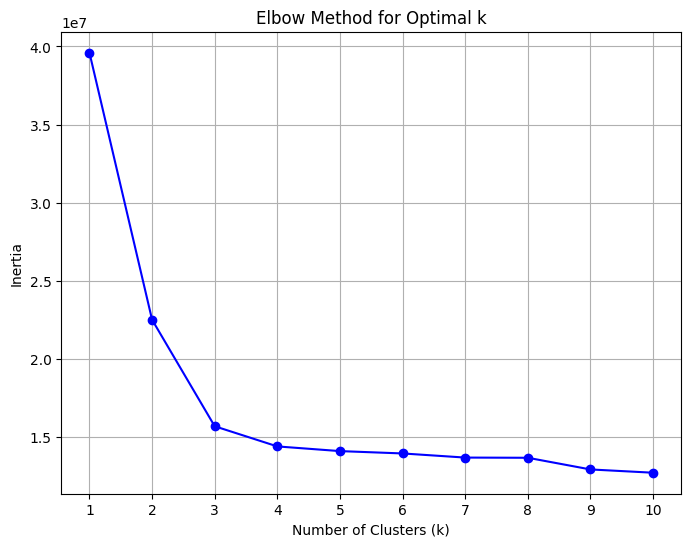

In [ ]:
#elbow method for k-medoid
import pandas as pd
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt



# DataFrame
df = pd.DataFrame({
    'District': commuteTime.keys(),
    'CommuteTime': commuteTime.values(),
    'LandCost': landCost.values(),
    'NumIntl': numIntl.values()
})


# Calculate inertia for different values of k
inertia = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMedoids(n_clusters=k, random_state=0)
    kmeans.fit(df[['CommuteTime', 'LandCost', 'NumIntl']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

for k-medoid, k=3 is appropriate

In [ ]:
#k-medoid
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
import plotly.graph_objects as go

np.set_printoptions(suppress=True)

# K-Medoids Clustering (원본 데이터)
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
import plotly.graph_objects as go
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

# 데이터 정규화
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['CommuteTime', 'LandCost', 'NumIntl']])

# K-Medoids Clustering (정규화 데이터)
kmedoids = KMedoids(n_clusters=num_clusters, random_state=0, metric='euclidean')
df['Cluster_Kmedoid_Normalized'] = kmedoids.fit_predict(normalized_data)

# Cluster Centers (Medoids, 정규화 데이터)
medoids_normalized = kmedoids.cluster_centers_

# Print Cluster Centers (Medoids, 정규화 데이터)
print("Cluster Centers (Medoids, Normalized Data):")
print('(Normalized Commute Time, Normalized Land Cost, Normalized NumIntl)')
for i, center in enumerate(medoids_normalized):
    print(f"Cluster {i + 1}: {center}")

# Filter districts that belong to each cluster (정규화 데이터 기준)
for cluster in range(num_clusters):
    cluster_districts = df[df['Cluster_Kmedoid_Normalized'] == cluster]['District']
    print(f"\nDistricts in Cluster {cluster + 1}:")
    print(cluster_districts.tolist())

# Plotly 3D Scatter Plot (정규화 데이터)
fig = go.Figure()

# Add clusters
colors = ['red', 'green', 'blue']
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster_Kmedoid_Normalized'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=normalized_data[df['Cluster_Kmedoid_Normalized'] == cluster][:, 0],
        y=normalized_data[df['Cluster_Kmedoid_Normalized'] == cluster][:, 1],
        z=normalized_data[df['Cluster_Kmedoid_Normalized'] == cluster][:, 2],
        mode='markers',
        marker=dict(size=5, color=colors[cluster]),
        name=f'Cluster {cluster + 1}'
    ))

# Add medoids
fig.add_trace(go.Scatter3d(
    x=medoids_normalized[:, 0],
    y=medoids_normalized[:, 1],
    z=medoids_normalized[:, 2],
    mode='markers',
    marker=dict(size=10, color='black', symbol='x'),
    name='Medoids'
))

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title='Normalized Commute Time',
        yaxis_title='Normalized Land Cost',
        zaxis_title='Normalized Number of Intl. Schools'
    ),
    title='3D K-Medoids Clustering (Normalized Data)',
    showlegend=True
)
fig.show()

Cluster Centers (Medoids, Normalized Data):
(Normalized Commute Time, Normalized Land Cost, Normalized NumIntl)
Cluster 1: [0.14       0.37214576 0.45842658]
Cluster 2: [0.62       0.1674526  0.36520916]
Cluster 3: [0.46       0.0479682  0.01540713]

Districts in Cluster 1:
['강남구', '광진구', '동대문구', '동작구', '마포구', '서대문구', '성동구', '용산구', '종로구', '중구']

Districts in Cluster 2:
['관악구', '성북구']

Districts in Cluster 3:
['강동구', '강북구', '강서구', '구로구', '금천구', '노원구', '도봉구', '서초구', '송파구', '양천구', '영등포구', '은평구', '중랑구']


--> pick cluster 1

selected 구 by k-medoid: ['강남구', '광진구', '동대문구', '동작구', '마포구', '서대문구', '성동구', '용산구', '종로구', '중구']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:



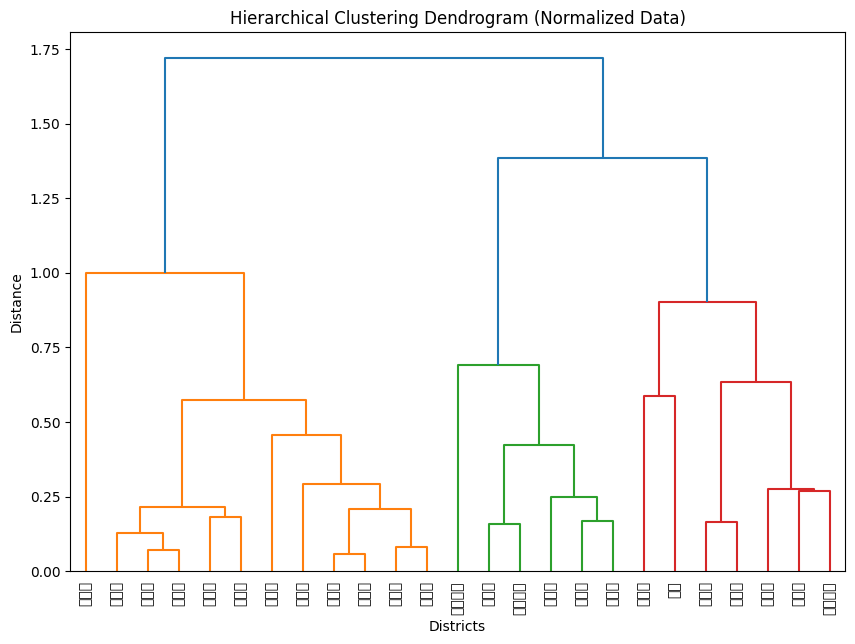


k=3 군집별 평균 (정규화된 데이터):
              CommuteTime  LandCost   NumIntl
Cluster_Hier                                 
1                0.548333  0.073870  0.130573
2                0.190000  0.244370  0.566850
3                0.262857  0.517481  0.101148


In [ ]:
#for hierarchical, used same k from k-mean
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 데이터 추출
data = df[['CommuteTime', 'LandCost', 'NumIntl']].values

# (2) Hierarchical Clustering (정규화 데이터)
# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['CommuteTime', 'LandCost', 'NumIntl']])

# Perform hierarchical clustering on normalized data
linkage_matrix_normalized = sch.linkage(normalized_data, method='ward')

# Plot the dendrogram for normalized data
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix_normalized, labels=df['District'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Normalized Data)')
plt.xlabel('Districts')
plt.ylabel('Distance')
plt.show()

# Create clusters with k=3 on normalized data
clusters_normalized = fcluster(linkage_matrix_normalized, t=3, criterion='maxclust')
df['Cluster_Hier_Normalized'] = clusters_normalized

# Calculate cluster means (normalized data)
normalized_df = pd.DataFrame(normalized_data, columns=['CommuteTime', 'LandCost', 'NumIntl'])
normalized_df['Cluster_Hier'] = clusters_normalized
cluster_means_normalized = normalized_df.groupby('Cluster_Hier')[['CommuteTime', 'LandCost', 'NumIntl']].mean()

# Print cluster means for normalized data
print("\nk=3 군집별 평균 (정규화된 데이터):")
print(cluster_means_normalized)


--> pick cluster 2


In [ ]:
# 정규화된 데이터에서 Cluster 2에 해당하는 구들 출력
cluster_3_districts_normalized = df[df['Cluster_Hier_Normalized'] == 2]['District']
print("\nCluster 2에 해당하는 구들 (정규화된 데이터):")
print(cluster_3_districts_normalized.tolist())


Cluster 2에 해당하는 구들 (정규화된 데이터):
['광진구', '동대문구', '동작구', '마포구', '서대문구', '종로구']


kmean ['광진구', '동대문구', '서대문구']

kmedoid ['강남구', '광진구', '동대문구', '동작구', '마포구', '서대문구', '성동구', '용산구', '종로구', '중구']

hierarchical ['광진구', '동대문구', '동작구', '마포구', '서대문구', '종로구']

광진구, 동대문구, 서대문구